In [1]:
#Author: Eren Ali Aslangiray

import os as os
import librosa
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import IPython.display
from tensorflow.python.platform import gfile
from jupyterthemes import jtplot
jtplot.style(context='talk', fscale=1.4, spines=False)
import scipy

In [2]:
Path_Train = "/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.02/Train_Data/"
pathtest = "/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/123/"
xxx = "/Users/erenmac/Desktop/ENGR497/Code/Voice_Input_Test/1.wav"
yyy = "/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.01/1/erenmarvin.wav"
zzz = "/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.01/Train_Data/yes/0a2b400e_nohash_0.wav"

# Inspecting our own sound input here.

In [42]:
path = os.path.join(Path_Train,"*","*.wav")
wave_path = gfile.Glob(path)[0]


In [4]:
IPython.display.Audio(yyy)

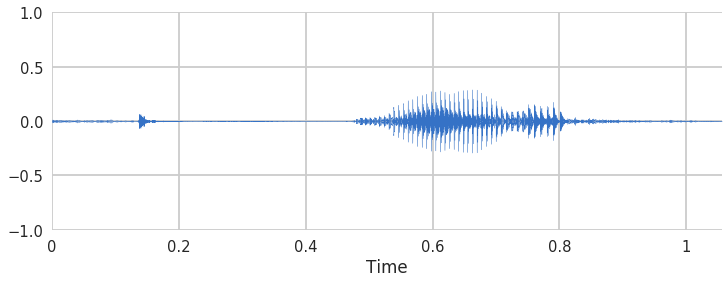

In [49]:
wave,sr = librosa.load(yyy,mono=True)
plt.figure(figsize=(12,4))
plt.axis([0, 1, -1, 1])
librosa.display.waveplot(wave,sr=sr)

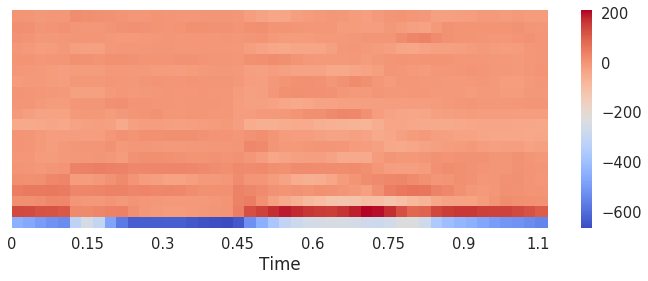

In [33]:
mfccs = librosa.feature.mfcc(y=wave,sr=sr,n_mfcc=20)
plt.figure(figsize=(12,4))
librosa.display.specshow(mfccs,x_axis ="time")
plt.colorbar()

In [34]:
len(mfccs)

20

# Here are some functions that I wrote for basic data transformations.

In [8]:
Height = 20
Width = 440
def get_mfcc (wave_path, Pad_width = Width):
    wave, sr = librosa.load(wave_path,mono=True)
    mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=Height)
    mfccs = np.pad(mfccs,((0,0),(0, Pad_width - len(mfccs[0]))),mode = "constant")
    return mfccs

In [14]:
a = get_mfcc(yyy)

(a[1])

array([135.08885435, 133.58662206, 122.00471171, 117.72650151,
       112.69572726,  23.37440503,  22.54401532,  28.34532953,
        36.08201734,  40.20877375,  12.25776052,  -3.48040387,
       -12.13574555, -15.29048916, -13.88096378, -12.13822872,
        -6.60420095,  -0.56950024,   2.91638327,  44.80919602,
       126.4328056 , 146.32885625, 170.16846983, 191.43212989,
       176.05495883, 161.71823294, 154.83812986, 153.74002568,
       166.64339402, 186.54176984, 209.26180067, 199.48918738,
       174.64513013, 125.12318391,  88.64905008,  93.06052323,
       137.96828484, 153.87623078, 159.28679158, 158.23373013,
       149.73579123, 145.86443681, 144.2939027 , 135.03968944,
       122.12030345, 104.92280859,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [8]:
Label_to_index_map = {"right":0,"eight":1,"cat":2,"tree":3,"backward":4,"learn":5,"bed":6,"happy":7,"go":8,"dog":9,"no":10,"wow":11,"follow":12,"nine":13,"left":14,"stop":15,"three":16,"sheila":17,"one":18,"bird":19,"zero":20,"seven":21,"up":22,"visual":23,"marvin":24,"two":25,"house":26,"down":27,"six":28,"yes":29,"on":30,"five":31,"forward":32,"off":33,"four":34}
_,label = os.path.split(os.path.dirname(wave_path))
encoding = [0]*len(Label_to_index_map)
encoding[Label_to_index_map[label]]=1
print ("Inspected file's adress:",wave_path)
print ("Name of label:",label)
print ("Encoding:",encoding)

("Inspected file's adress:", '/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.02/Train_Data/right/8e523821_nohash_2.wav')
('Name of label:', 'right')
('Encoding:', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [9]:
from os import listdir
from os.path import isfile, join
import random

def Test_data_seperator ():
    for x in Label_to_index_map:
        #newpath = '/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.02/'+x+"/" 
        #destination = '/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.02/Test_Data/'+x+"/"
        path, dirs, files = next(os.walk(newpath))
        file_count = len(files)
        test_count = int(file_count * 0.2)
        train_count = file_count-test_count
        onlyfiles = []
        onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
        for i in range(0,test_count):
            randnum = random.randrange(len(onlyfiles)-1)
            os.rename(newpath+onlyfiles[randnum],destination+onlyfiles[randnum])
            onlyfiles.pop(randnum)

In [10]:
def Train_data_seperator ():
    for x in Label_to_index_map:
        #newpath = '/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.02/'+x+"/" 
        #destination = '/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.02/Train_Data/'+x+"/"
        path, dirs, files = next(os.walk(newpath))
        onlyfiles = []
        onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
        for i in range(0,len(onlyfiles)):
            os.rename(newpath+onlyfiles[i],destination+onlyfiles[i])

In [6]:
from pydub import AudioSegment
t1 = 0 * 200 #Works in milliseconds
t2 = 1 * 1000
newAudio = AudioSegment.from_wav(yyy)
newAudio = newAudio[t1:t2]
newAudio.export('sumeyyezeronew.wav', format="wav") #Exports to a wav file in the current path.


<_io.BufferedRandom name='sumeyyezeronew.wav'>

# Here are some feature extraction operations I do on acoustic sound data.

In [57]:
path_data_inspect = "/Users/erenmac/Desktop/ENGR497/Data/Speech_Data/speech_commands_v0.01/Test_Data/backward/0a2b400e_nohash_4.wav"

## Basic wave and sr extraction.

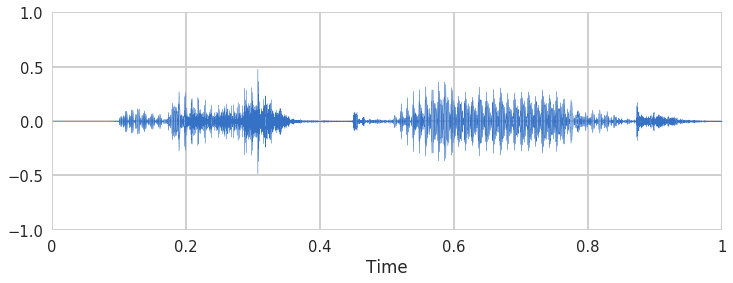

In [81]:
wave1,sr1 = librosa.load(path_data_inspect,mono=True)
plt.figure(figsize=(12,4))
plt.axis([0, 1, -1, 1])
librosa.display.waveplot(wave1,sr=sr1)

## MFCC with n=20

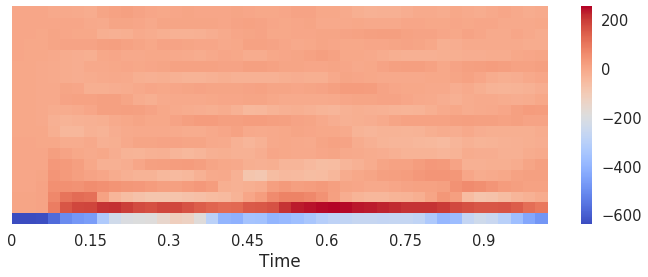

In [82]:
mfcc0 = librosa.feature.mfcc(y=wave1,sr=sr1,n_mfcc=20)
plt.figure(figsize=(12,4))
librosa.display.specshow(mfccs0,x_axis ="time")
plt.colorbar()

## MFCC with Mel Spectogram

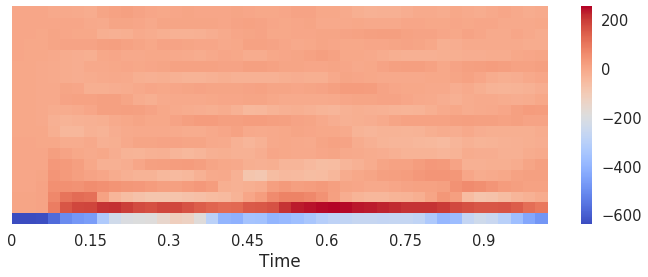

In [83]:
S = librosa.feature.melspectrogram(y=wave1, sr=sr1)
mfcc_withmel = librosa.feature.mfcc(S=librosa.power_to_db(S))
plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc_withmel,x_axis ="time")
plt.colorbar()

## Delta = 1 

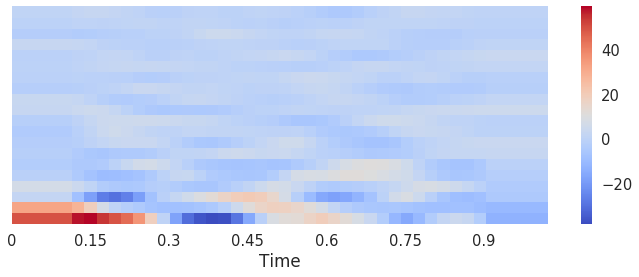

In [86]:
mfcc_delta = librosa.feature.delta(mfcc0)
plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc_delta,x_axis ="time")
plt.colorbar()

## Delta = 2

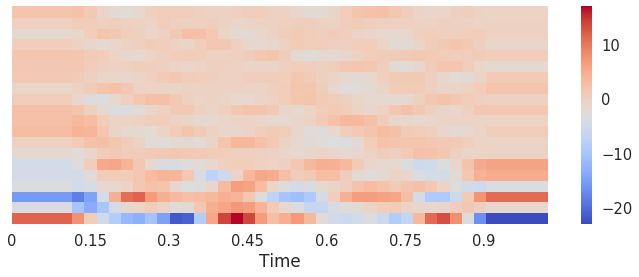

In [100]:
mfcc_delta2 = librosa.feature.delta(mfcc0, order=2)
plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc_delta2,x_axis ="time")
plt.colorbar()

## MFCC with Discrete Cosine Transform

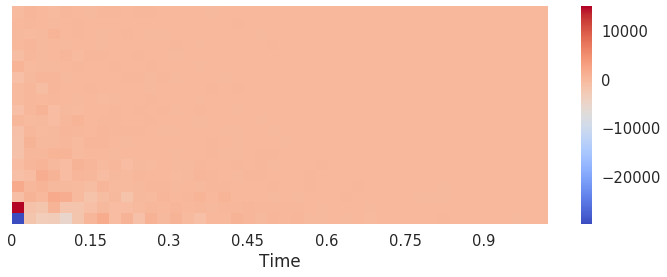

In [98]:
mfcc_dct = scipy.fftpack.dct(mfcc0)
plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc_dct,x_axis ="time")
plt.colorbar()

## Power of the sound in RMS value

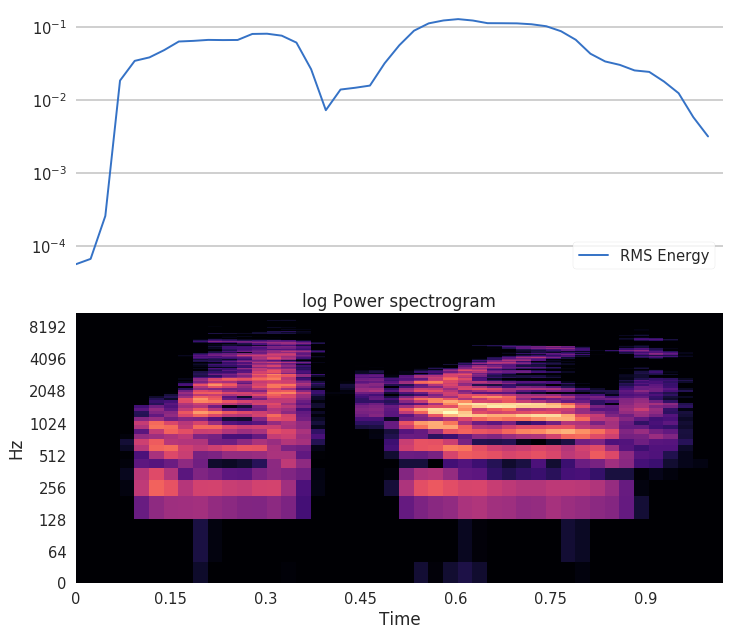

In [107]:
rms = librosa.feature.rmse(y=wave1)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()